<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Overview:" data-toc-modified-id="Data-Overview:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Overview:</a></span><ul class="toc-item"><li><span><a href="#Importing,-Importing,-Importing:" data-toc-modified-id="Importing,-Importing,-Importing:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing, Importing, Importing:</a></span></li><li><span><a href="#Read-Data:" data-toc-modified-id="Read-Data:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Read Data:</a></span></li></ul></li><li><span><a href="#Data-Problems:" data-toc-modified-id="Data-Problems:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Problems:</a></span><ul class="toc-item"><li><span><a href="#Removing-Outliners:" data-toc-modified-id="Removing-Outliners:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Removing Outliners:</a></span><ul class="toc-item"><li><span><a href="#SalePrice:" data-toc-modified-id="SalePrice:-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>SalePrice:</a></span></li><li><span><a href="#LotFrontage:" data-toc-modified-id="LotFrontage:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>LotFrontage:</a></span></li></ul></li><li><span><a href="#Categorical-~>-Numerical:" data-toc-modified-id="Categorical-~>-Numerical:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical ~&gt; Numerical:</a></span><ul class="toc-item"><li><span><a href="#Ordinal-Features:" data-toc-modified-id="Ordinal-Features:-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Ordinal Features:</a></span><ul class="toc-item"><li><span><a href="#Converting-Ordinal-Featuers:" data-toc-modified-id="Converting-Ordinal-Featuers:-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>Converting Ordinal Featuers:</a></span></li></ul></li><li><span><a href="#Categorical-(Nominal)-Features:" data-toc-modified-id="Categorical-(Nominal)-Features:-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Categorical (Nominal) Features:</a></span></li></ul></li><li><span><a href="#Drop-Semi-Constant-Features:" data-toc-modified-id="Drop-Semi-Constant-Features:-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Drop Semi-Constant Features:</a></span></li></ul></li><li><span><a href="#Store-Resultant-Datasets:" data-toc-modified-id="Store-Resultant-Datasets:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Store Resultant Datasets:</a></span></li></ul></div>

<center style='font-size:40px'><b>Data Preprocessing</b></center>

# Data Overview:
## Importing, Importing, Importing:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_columns = 1000

import seaborn as sns
from util import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Read Data:

In [2]:
train = pd.read_csv('../1_Data Invistigation & EDA/train_null_removed.csv')
test  = pd.read_csv('../1_Data Invistigation & EDA/test_null_removed.csv')

In [3]:
train.fillna('NaN', inplace=True)

train.isna().sum().sum()

0

# Data Problems:
## Removing Outliners:
### SalePrice:

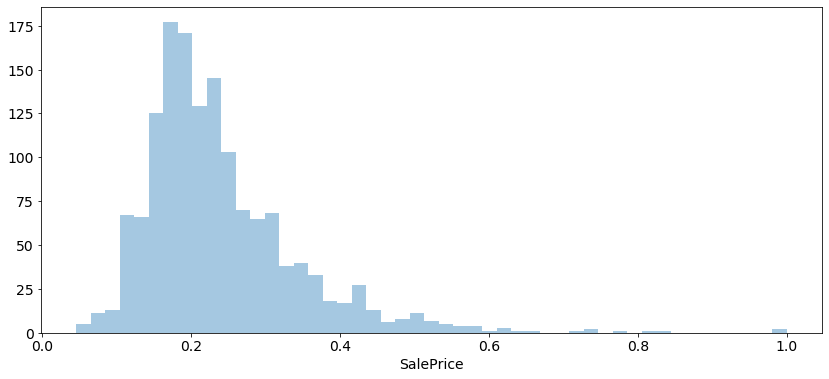

In [4]:
# Let's see the historgram of `SalePrice`
plt.rcParams['font.size'] = 14
plt.figure(figsize=(14, 6))
sns.distplot(train.SalePrice / train.SalePrice.max(), kde=False);

In [5]:
# Let's see how many points larger than 0.9
print(f' ~> Number of points that are considered as outliers: {len(train[train.SalePrice/train.SalePrice.max() > .9])}')

 ~> Number of points that are considered as outliers: 2


In [6]:
# Then let's see them
train[train.SalePrice/train.SalePrice.max() > .9].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,692
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,1183


In [7]:
train_outliers_removed = train[train.SalePrice/train.SalePrice.max() < .9]

print(f'~> Number of rows for old train: {bg(train.shape[0])}')
print(f'~> Number of rows for new train: {bg(train_outliers_removed.shape[0])}')

~> Number of rows for old train:  1,460 
~> Number of rows for new train:  1,458 


### LotFrontage:

In [8]:
train_outliers_removed = train_outliers_removed[train_outliers_removed.LotFrontage < 250]

In [9]:
print(f'~> Number of rows for old train: {bg(train.shape[0])}')
print(f'~> Number of rows for new train: {bg(train_outliers_removed.shape[0])}')

~> Number of rows for old train:  1,460 
~> Number of rows for new train:  1,456 


## Categorical ~> Numerical:

In [10]:
ord_cols  = ['LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtExposure', 
             'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'HeatingQC', 'Electrical', 
             'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
             'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
             'PoolQC', 'BedroomAbvGr', 'KitchenAbvGr']
cat_cols  = ['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 
            'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
            'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'GarageType', 'MiscFeature', 'SaleType', 
             'SaleCondition', 'HouseStyle', 'Fence', 'CentralAir']
num_cols  = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
date_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
to_drop   = ['Utilities', 'Street', 'PoolArea', 'MiscVal']

### Ordinal Features:

In [11]:
train_outliers_removed[ord_cols].select_dtypes('object').head()

,LandSlope,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
0,Gtl,Gd,TA,No,GLQ,TA,Gd,Unf,Ex,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN
1,Gtl,TA,TA,Gd,ALQ,TA,Gd,Unf,Ex,SBrkr,TA,Typ,TA,RFn,TA,TA,Y,NaN
2,Gtl,Gd,TA,Mn,GLQ,TA,Gd,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN
3,Gtl,TA,TA,No,ALQ,Gd,TA,Unf,Gd,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,NaN
4,Gtl,Gd,TA,Av,GLQ,TA,Gd,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN


In [12]:
train_outliers_removed[ord_cols].select_dtypes('object').apply(pd.Series.nunique).sort_values()

LandSlope       3
PavedDrive      3
GarageFinish    4
KitchenQual     4
PoolQC          4
ExterQual       4
BsmtCond        5
BsmtQual        5
BsmtExposure    5
ExterCond       5
HeatingQC       5
Electrical      6
FireplaceQu     6
GarageQual      6
GarageCond      6
BsmtFinType2    7
Functional      7
BsmtFinType1    7
dtype: int64

#### Converting Ordinal Featuers:

In [13]:
for dataset in [train_outliers_removed, test]:
    ## LandSlope
    dataset.LandSlope    = dataset.LandSlope.map({'Sev': 1, 'Mod': 2, 'Gtl': 3})
    
    ## PoolQC
    dataset.PoolQC       = dataset.PoolQC.map({'NaN': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})
    
    ## PavedDrive
    dataset.PavedDrive   = dataset.PavedDrive.map({'N': 1, 'P': 2, 'Y': 3})
    
    ## GarageFinish
    dataset.GarageFinish = dataset.GarageFinish.map({'NaN': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
    
    ## KitchenQual
    dataset.KitchenQual  = dataset.KitchenQual.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    ## BsmtQual
    dataset.BsmtQual     = dataset.BsmtQual.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    ## BsmtCond
    dataset.BsmtCond     = dataset.BsmtCond.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
        
    ## ExterQual
    dataset.ExterQual    = dataset.ExterQual.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    ## BsmtExposure
    dataset.BsmtExposure = dataset.BsmtExposure.map({'NaN': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
    
    ## ExterCond
    dataset.ExterCond    = dataset.ExterCond.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    ## HeatingQC
    dataset.HeatingQC    = dataset.HeatingQC.map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    # Electrical
    dataset.Electrical   = dataset.Electrical.map({'Mix': 1, 'FuseP': 2, 'FuseF': 3, 'FuseA': 4, 'SBrkr': 5})
    
    # FireplaceQu
    dataset.FireplaceQu  = dataset.FireplaceQu.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    # GarageQual
    dataset.GarageQual   = dataset.GarageQual.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    # GarageCond
    dataset.GarageCond   = dataset.GarageCond.map({'NaN': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
    
    # BsmtFinType2
    dataset.BsmtFinType2 = dataset.BsmtFinType2.map({'NaN': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
    
    # Functional
    dataset.Functional   = dataset.Functional.map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})
    
    # BsmtFinType1
    dataset.BsmtFinType1 = dataset.BsmtFinType1.map({'NaN': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})

In [14]:
## Sanity Check
train_outliers_removed[ord_cols].head()

,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFinType2,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,BedroomAbvGr,KitchenAbvGr
0,3,7,5,4,3,1,6,3,4,1,5,5.0,1,0,2,1,4,8,8,0,0,2,2,3,3,3,0,3,1
1,3,6,8,3,3,4,5,3,4,1,5,5.0,0,1,2,0,3,6,8,1,3,2,2,3,3,3,0,3,1
2,3,7,5,4,3,2,6,3,4,1,5,5.0,1,0,2,1,4,6,8,1,3,2,2,3,3,3,0,3,1
3,3,7,5,3,3,1,5,4,3,1,4,5.0,1,0,1,0,4,7,8,1,4,1,3,3,3,3,0,3,1
4,3,8,5,4,3,3,6,3,4,1,5,5.0,1,0,2,1,4,9,8,1,3,2,3,3,3,3,0,4,1


### Categorical (Nominal) Features:

In [15]:
train_outliers_removed[cat_cols].head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,GarageType,MiscFeature,SaleType,SaleCondition,HouseStyle,Fence,CentralAir
0,60,RL,NaN,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal,2Story,NaN,Y
1,20,RL,NaN,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Attchd,NaN,WD,Normal,1Story,NaN,Y
2,60,RL,NaN,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal,2Story,NaN,Y
3,70,RL,NaN,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,Gable,CompShg,Wd Sdng,Wd Shng,None,BrkTil,GasA,Detchd,NaN,WD,Abnorml,2Story,NaN,Y
4,60,RL,NaN,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Attchd,NaN,WD,Normal,2Story,NaN,Y


In [16]:
# Converting them.
for col in cat_cols:
    train_outliers_removed[col] = pd.factorize(train_outliers_removed[col])[0]
    test[col]                   = pd.factorize(test[col])[0]

In [17]:
train_outliers_removed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,0,0,65.0,8450,Pave,0,0,0,AllPub,0,3,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196,4,3,0,4,3,1,6,706,1,0,150,856,0,5,0,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,0,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,0,0,2,2008,0,0,208500,1
1,1,0,80.0,9600,Pave,0,0,0,AllPub,1,3,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0,3,3,1,4,3,4,5,978,1,0,284,1262,0,5,0,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,0,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,0,0,5,2007,0,0,181500,2
2,0,0,68.0,11250,Pave,0,1,0,AllPub,0,3,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162,4,3,0,4,3,2,6,486,1,0,434,920,0,5,0,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,0,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,0,0,9,2008,0,0,223500,3
3,2,0,60.0,9550,Pave,0,1,0,AllPub,2,3,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0,3,3,2,3,4,1,5,216,1,0,540,756,0,4,0,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,0,0,2,2006,0,1,140000,4
4,0,0,84.0,14260,Pave,0,1,0,AllPub,1,3,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350,4,3,0,4,3,3,6,655,1,0,490,1145,0,5,0,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,0,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,0,0,12,2008,0,0,250000,5


## Drop Semi-Constant Features:

In [18]:
train_outliers_removed = train_outliers_removed.drop(to_drop, axis=1)
test                   = test.drop(to_drop, axis=1)
train_outliers_removed.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Id
0,0,0,65.0,8450,0,0,0,0,3,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196,4,3,0,4,3,1,6,706,1,0,150,856,0,5,0,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,0,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,2,2008,0,0,208500,1
1,1,0,80.0,9600,0,0,0,1,3,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0,3,3,1,4,3,4,5,978,1,0,284,1262,0,5,0,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,0,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,5,2007,0,0,181500,2
2,0,0,68.0,11250,0,1,0,0,3,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162,4,3,0,4,3,2,6,486,1,0,434,920,0,5,0,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,0,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,9,2008,0,0,223500,3
3,2,0,60.0,9550,0,1,0,2,3,2,0,0,0,0,7,5,1915,1970,0,0,2,2,1,0,3,3,2,3,4,1,5,216,1,0,540,756,0,4,0,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,2,2006,0,1,140000,4
4,0,0,84.0,14260,0,1,0,1,3,3,0,0,0,0,8,5,2000,2000,0,0,0,0,0,350,4,3,0,4,3,3,6,655,1,0,490,1145,0,5,0,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,0,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,12,2008,0,0,250000,5


# Store Resultant Datasets:

In [19]:
from tqdm import tqdm_notebook

def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('~> Memory usage of dataframe is {:.3f} MB'.format(start_mem))

    for col in tqdm_notebook(df.columns):
        col_type = df[col].dtype
        if col_type != object:
                c_min = df[col].min()
                c_max = df[col].max()
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                        df[col] = df[col].astype(np.uint8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                        df[col] = df[col].astype(np.uint16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                        df[col] = df[col].astype(np.uint32)                    
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)
                    elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)
        ## Comment this if you have NaN value in this column.
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('~> Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('~> Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    print('---'*20)
    return df

In [20]:
train_outliers_removed = reduce_mem_usage(train_outliers_removed)
test                   = reduce_mem_usage(test)

~> Memory usage of dataframe is 0.866 MB



~> Memory usage after optimization is: 0.171 MB
~> Decreased by 80.3%
------------------------------------------------------------
~> Memory usage of dataframe is 0.835 MB



~> Memory usage after optimization is: 0.155 MB
~> Decreased by 81.5%
------------------------------------------------------------


In [21]:
train_outliers_removed.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)